In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib

In [39]:
df = pd.read_csv('../data/processed/preprocessed_data.csv')

In [40]:
x = df.drop("Grade", axis=1)
y = df["Grade"]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [43]:
y_pred = model.predict(x_test)

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.906
Classification Report:
               precision    recall  f1-score   support

           A       0.25      0.40      0.31         5
           B       0.76      0.96      0.85       134
           C       0.99      0.88      0.93       450
           D       0.96      0.91      0.93       358
           F       0.65      1.00      0.79        53

    accuracy                           0.91      1000
   macro avg       0.72      0.83      0.76      1000
weighted avg       0.93      0.91      0.91      1000



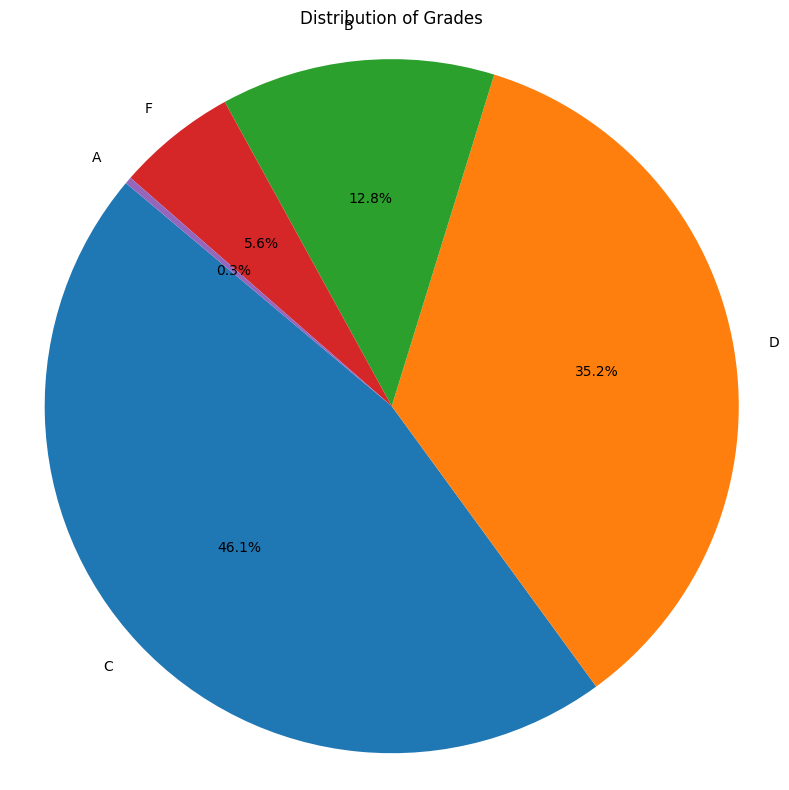

In [45]:
grade_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Grades')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [46]:
joblib.dump(model, '../models/student_grade_model.pkl')

['../models/student_grade_model.pkl']